In [86]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [87]:
# Load and preprocess data
# Replace 'inventory_data.csv' with your dataset file
data = pd.read_csv('Inventory_Management.csv')

In [88]:
data

,ProductID,ProductName,Category,QuantityInStock,Price
0,P001,Mouse,Electronics,150,299.99
1,P002,Fridge,Home Appliances,75,199.99
2,P003,Twisted,Books,300,15.99
3,P004,Tabel,Furniture,20,599.99
4,P005,TeddyBear,Toys,250,29.99
5,P006,HairBrush,Electronics,150,21.09
6,P007,VaccumCleaner,Home Appliances,75,39.59
7,P008,CloudComputing,Books,300,14.99
8,P009,PowerBank,Electronics,150,21.09
9,P010,Dishwasher,Home Appliances,75,39.59


In [89]:
# Example columns: 'ProductID', 'ProductName', 'Category', 'QuantityInStock', 'Price'
data['Date'] = pd.to_datetime(data.get('Date', pd.Timestamp.now()))  # Add date if not present for time-series modeling
data.set_index('Date', inplace=True, drop=False)

In [90]:
# Feature engineering
data['TotalValue'] = data['QuantityInStock'] * data['Price']  # Calculate stock value

<ipython-input-91-31010a768a28>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Category', y='QuantityInStock', ci=None)


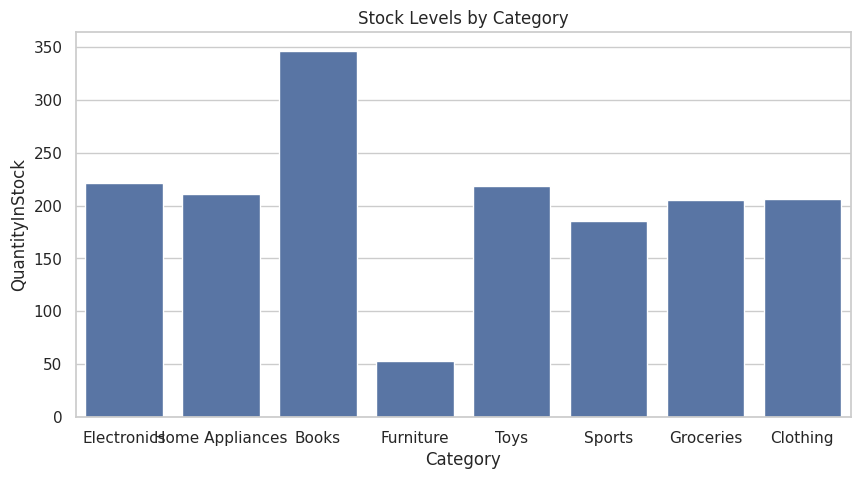

In [91]:
# Visualize stock levels
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x='Category', y='QuantityInStock', ci=None)
plt.title("Stock Levels by Category")
plt.show()

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare data for demand forecasting
# Use 'QuantityInStock' as the target variable and 'Price' and 'Category' as features
data['Category'] = data['Category'].astype('category').cat.codes  # Encode categorical 'Category'

X = data[['Category', 'Price']]
y = data['QuantityInStock']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [93]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# ABC Analysis: Categorizing inventory by value (Price * Quantity)
data['InventoryValue'] = data['QuantityInStock'] * data['Price']
data['ABC_Category'] = pd.qcut(data['InventoryValue'], q=3, labels=['C', 'B', 'A'])

# Results
rmse, r2, data[['ProductID', 'ProductName', 'InventoryValue', 'ABC_Category']]


(188.8215039395672,
 -2.3428430314542776,
                            ProductID       ProductName  InventoryValue  \
 Date                                                                     
 2024-12-09 01:32:09.345569      P001             Mouse        44998.50   
 2024-12-09 01:32:09.345569      P002            Fridge        14999.25   
 2024-12-09 01:32:09.345569      P003           Twisted         4797.00   
 2024-12-09 01:32:09.345569      P004             Tabel        11999.80   
 2024-12-09 01:32:09.345569      P005         TeddyBear         7497.50   
 2024-12-09 01:32:09.345569      P006         HairBrush         3163.50   
 2024-12-09 01:32:09.345569      P007     VaccumCleaner         2969.25   
 2024-12-09 01:32:09.345569      P008    CloudComputing         4497.00   
 2024-12-09 01:32:09.345569      P009         PowerBank         3163.50   
 2024-12-09 01:32:09.345569      P010        Dishwasher         2969.25   
 2024-12-09 01:32:09.345569      P011    HalfGirlfriend   

In [94]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

# Clustering Analysis: Group products based on Category, Price, and QuantityInStock
clustering_features = data[['Category', 'Price', 'QuantityInStock']]
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(clustering_features)

# Price Optimization: Predict QuantityInStock based on Price using Linear Regression
price_model = LinearRegression()
X_price = data[['Price']]
y_stock = data['QuantityInStock']
price_model.fit(X_price, y_stock)


LinearRegression()

In [95]:
# Predict stock levels for a range of prices
price_range = np.linspace(data['Price'].min(), data['Price'].max(), 100).reshape(-1, 1)
predicted_stock = price_model.predict(price_range)

# Summary of Clusters and Price Optimization Results
cluster_summary = data.groupby('Cluster')[['Price', 'QuantityInStock']].mean()
cluster_summary, price_range.flatten(), predicted_stock

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(              Price  QuantityInStock
 Cluster                             
 0        925.167273       307.181818
 1        150.440400       184.040000
 2        669.029286       159.928571,
 array([ 14.99      ,  24.79949495,  34.6089899 ,  44.41848485,
         54.2279798 ,  64.03747475,  73.8469697 ,  83.65646465,
         93.4659596 , 103.27545455, 113.08494949, 122.89444444,
        132.70393939, 142.51343434, 152.32292929, 162.13242424,
        171.94191919, 181.75141414, 191.56090909, 201.37040404,
        211.17989899, 220.98939394, 230.79888889, 240.60838384,
        250.41787879, 260.22737374, 270.03686869, 279.84636364,
        289.65585859, 299.46535354, 309.27484848, 319.08434343,
        328.89383838, 338.70333333, 348.51282828, 358.32232323,
        368.13181818, 377.94131313, 387.75080808, 397.56030303,
        407.36979798, 417.17929293, 426.98878788, 436.79828283,
        446.60777778, 456.41727273, 466.22676768, 476.03626263,
        485.84575758, 495.65525253, 505.4

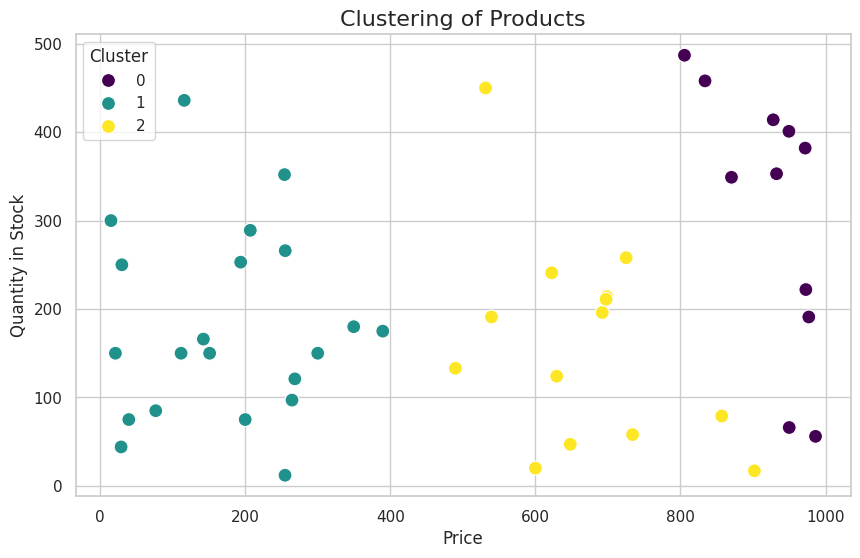

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set(style="whitegrid")

# 1. Cluster Visualization: Price vs QuantityInStock colored by Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Price',
    y='QuantityInStock',
    hue='Cluster',
    data=data,
    palette='viridis',
    s=100
)
plt.title("Clustering of Products", fontsize=16)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Quantity in Stock", fontsize=12)
plt.legend(title="Cluster")
plt.show()

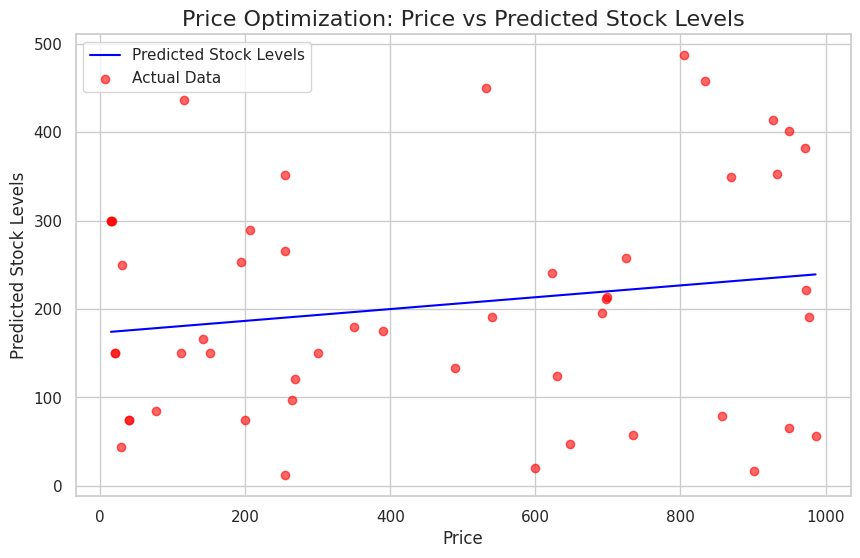

In [97]:
# 2. Price Optimization: Predicted Stock Levels vs Price Range
plt.figure(figsize=(10, 6))
plt.plot(price_range, predicted_stock, label='Predicted Stock Levels', color='blue')
plt.scatter(data['Price'], data['QuantityInStock'], color='red', alpha=0.6, label='Actual Data')
plt.title("Price Optimization: Price vs Predicted Stock Levels", fontsize=16)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Predicted Stock Levels", fontsize=12)
plt.legend()
plt.show()



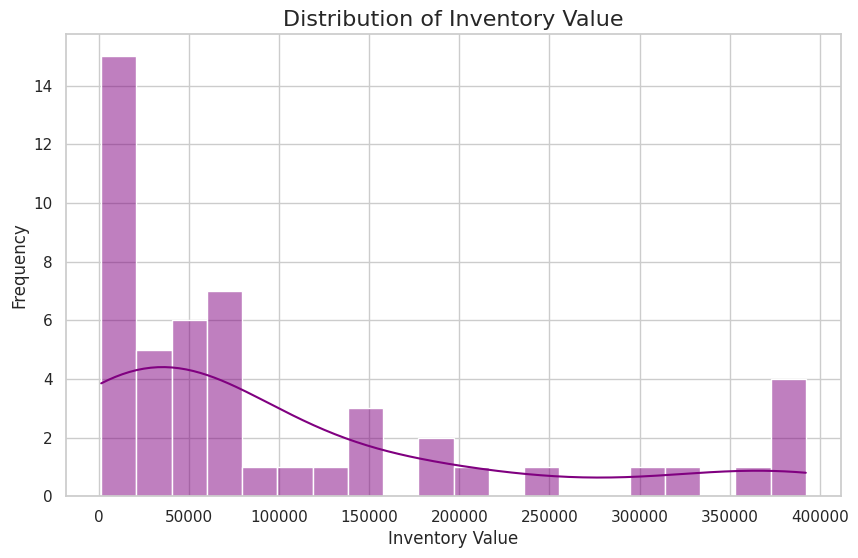

In [98]:
# 3. Inventory Value Distribution: Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['InventoryValue'], bins=20, kde=True, color='purple')
plt.title("Distribution of Inventory Value", fontsize=16)
plt.xlabel("Inventory Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()